In [1]:
import pandas as pd
import seaborn as sns

In [2]:
mall_dataset = pd.read_csv("./datasets/mall_customer/dataset.csv")

mall_dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
mall_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
mall_dataset["Gender"] = mall_dataset["Gender"].map({"Female": 0, "Male": 1})

In [5]:
mall_dataset.rename(
    columns={
        "Annual Income (k$)": "Annual_Income",
        "Spending Score (1-100)": "Spending_Score",
    },
    inplace=True,
)

In [6]:
mall_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      200 non-null    int64
 1   Gender          200 non-null    int64
 2   Age             200 non-null    int64
 3   Annual_Income   200 non-null    int64
 4   Spending_Score  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


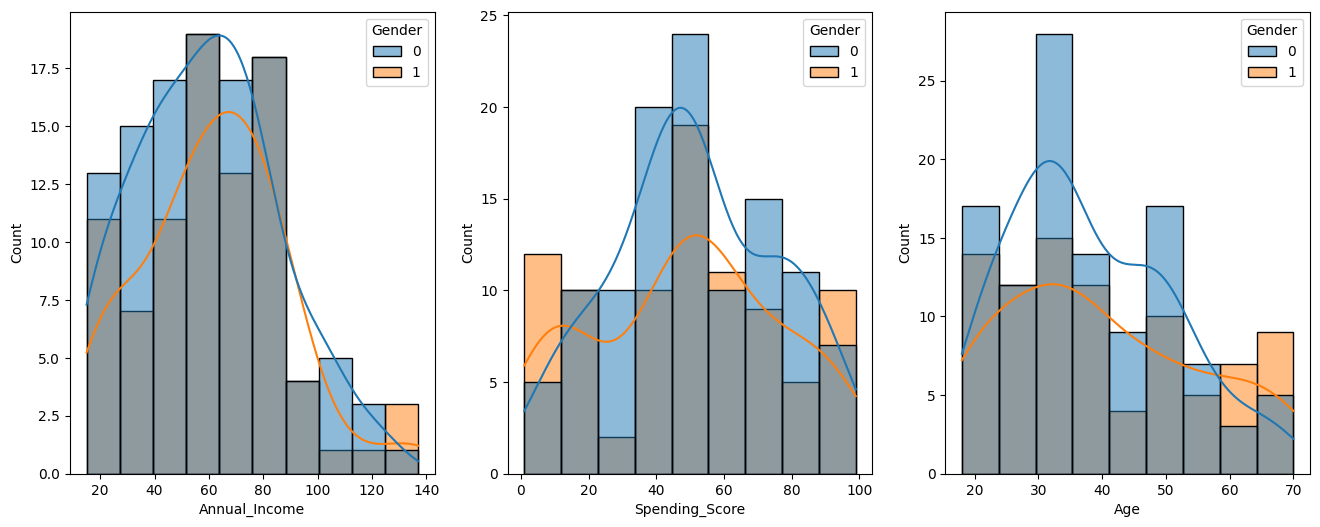

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16, 6))


sns.histplot(data=mall_dataset, x="Annual_Income", hue="Gender", ax=axes[0], kde=True)
sns.histplot(data=mall_dataset, x="Spending_Score", hue="Gender", ax=axes[1], kde=True)
sns.histplot(data=mall_dataset, x="Age", hue="Gender", ax=axes[2], kde=True)

plt.show()

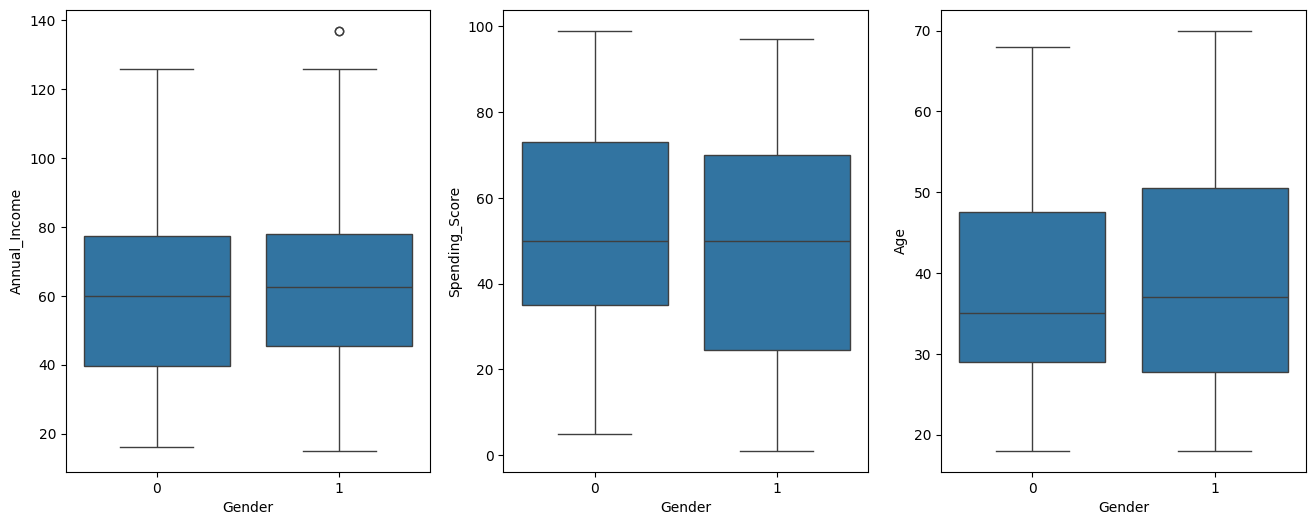

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))


sns.boxplot(data=mall_dataset, y="Annual_Income", x="Gender", ax=axes[0])
sns.boxplot(data=mall_dataset, y="Spending_Score", x="Gender", ax=axes[1])
sns.boxplot(data=mall_dataset, y="Age", x="Gender", ax=axes[2])

plt.show()

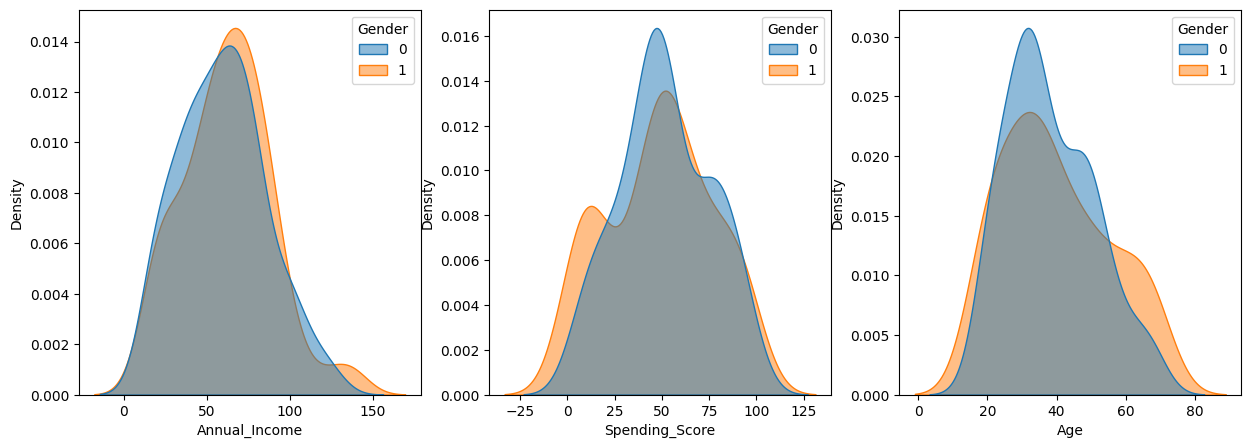

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.kdeplot(
    data=mall_dataset,
    x="Annual_Income",
    hue="Gender",
    fill=True,
    common_norm=False,
    alpha=0.5,
    ax=axes[0],
)

sns.kdeplot(
    data=mall_dataset,
    x="Spending_Score",
    hue="Gender",
    fill=True,
    common_norm=False,
    alpha=0.5,
    ax=axes[1],
)

sns.kdeplot(
    data=mall_dataset,
    x="Age",
    hue="Gender",
    fill=True,
    common_norm=False,
    alpha=0.5,
    ax=axes[2],
)

plt.show()

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

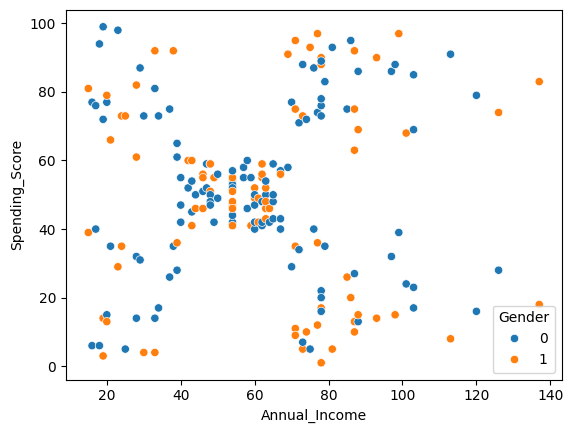

In [21]:
sns.scatterplot(mall_dataset, x="Annual_Income", y="Spending_Score", hue="Gender")

<Axes: xlabel='Age', ylabel='Annual_Income'>

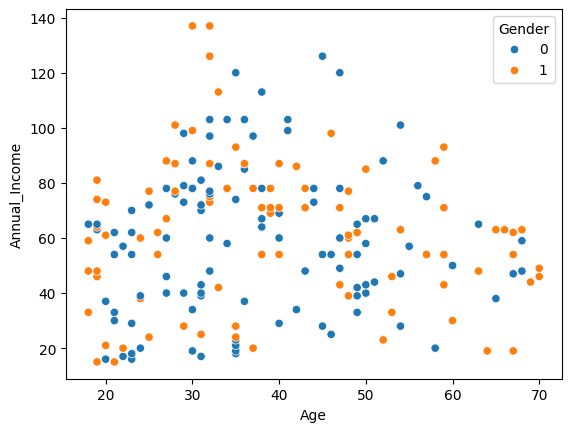

In [23]:
sns.scatterplot(mall_dataset, x="Age", y="Annual_Income", hue="Gender")

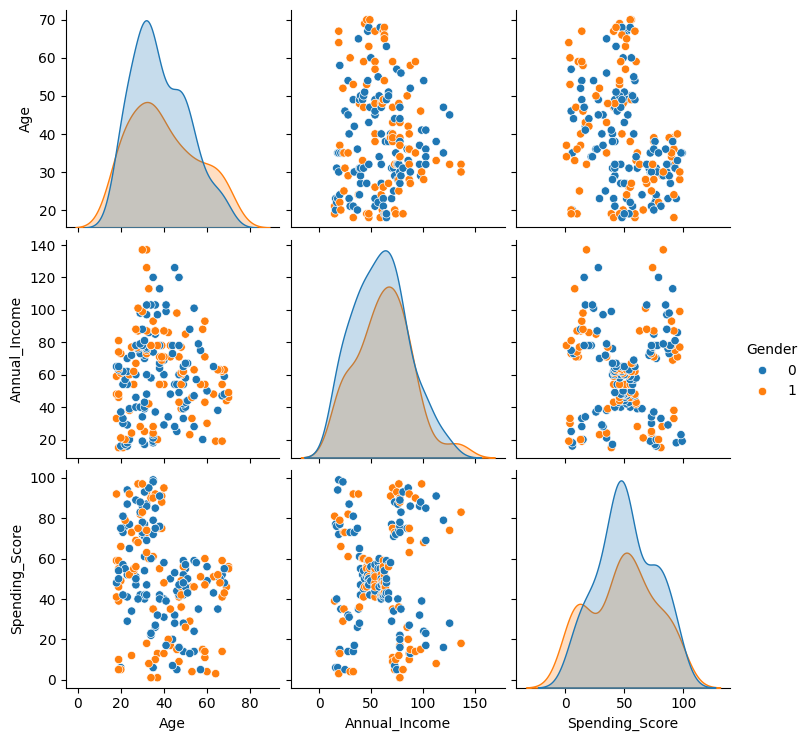

In [25]:
sns.pairplot(
    mall_dataset,
    hue="Gender",
    vars=mall_dataset.drop(columns=["CustomerID", "Gender"], axis=1).columns,
)

In [ ]:
from sklearn.preprocessing import StandardScaler

features = mall_dataset[
    mall_dataset.drop(columns=["Gender", "CustomerID"], axis=1).columns
]

scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

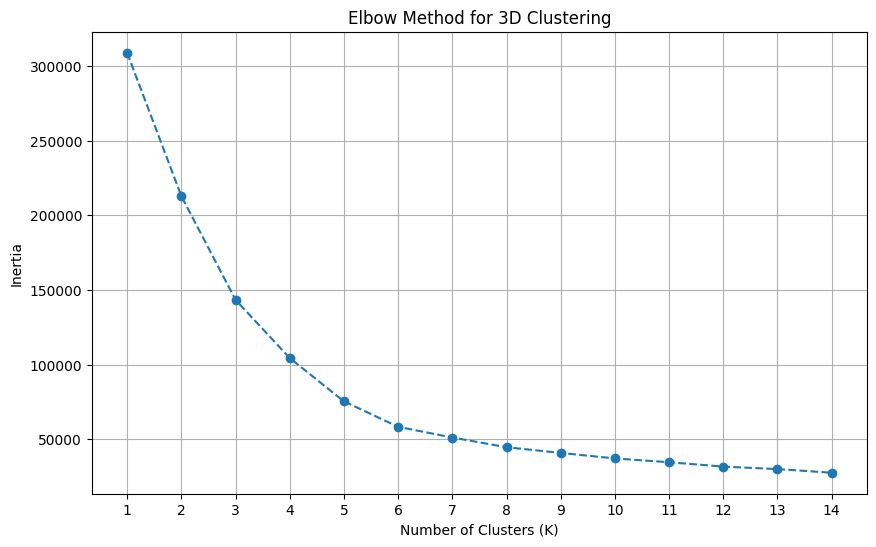

In [ ]:
from sklearn.cluster import KMeans


k_range = range(1, 15)

outputs = []

for k in k_range:
    kmeans = KMeans(
        n_clusters=k, init="k-means++", random_state=42, n_init=10
    )  # run algo 10 times and use the best model from it
    kmeans.fit(features)
    outputs.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, outputs, marker="o", linestyle="--")
plt.title("Elbow Method for 3D Clustering")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.grid(True)
plt.show()

### Findings

For k = 6, the clusters inertia seems to be good, after which the decrease is slow, so k = 6 is ideal


In [ ]:
import plotly.express as px

optimal_k = 6

# Run K-Means with the optimal K
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(features)

mall_dataset["Cluster"] = cluster_labels

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    mall_dataset,
    x="Annual_Income",
    y="Spending_Score",
    z="Age",
    color="Cluster",
    symbol="Gender",
    title="Customer Segments",
    labels={"Annual_Income": "Annual Income", "Spending_Score": "Spending Score"},
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()